In [1]:
install.packages("changepoint")
install.packages("datasets")
install.packages("magrittr")
install.packages("pacman")
install.packages("tidyverse")
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘writexl’, ‘R.utils’




In [4]:
?AirPassengers

In [5]:
df<-AirPassengers

In [8]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [10]:
library(dplyr)  # or
library(magrittr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




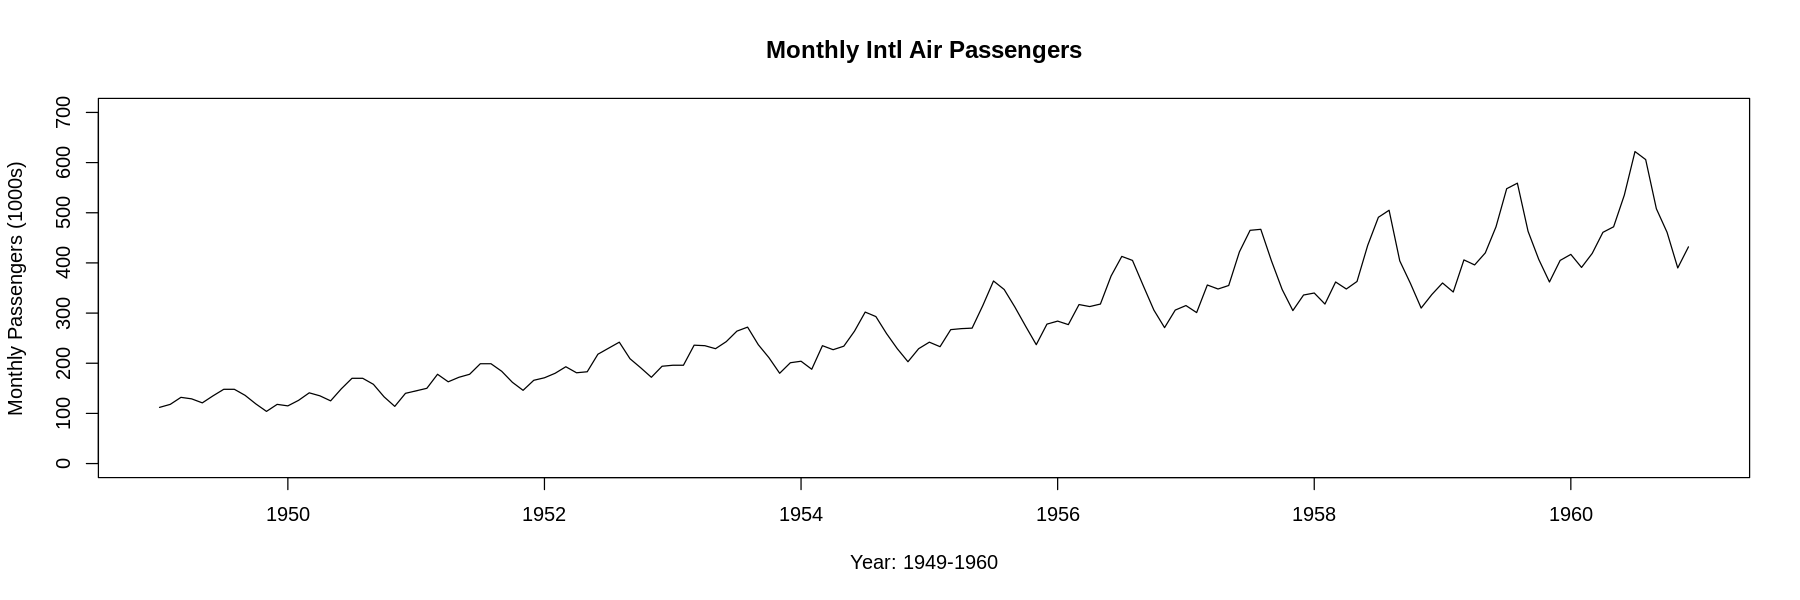

In [12]:
# plot time series
options(repr.plot.width = 15, repr.plot.height = 5)  # for larger plot display in RStudio/Notebooks

df%>%plot(main="Monthly Intl Air Passengers",xlab="Year: 1949-1960",
          ylab="Monthly Passengers (1000s)",ylim=c(0,700))

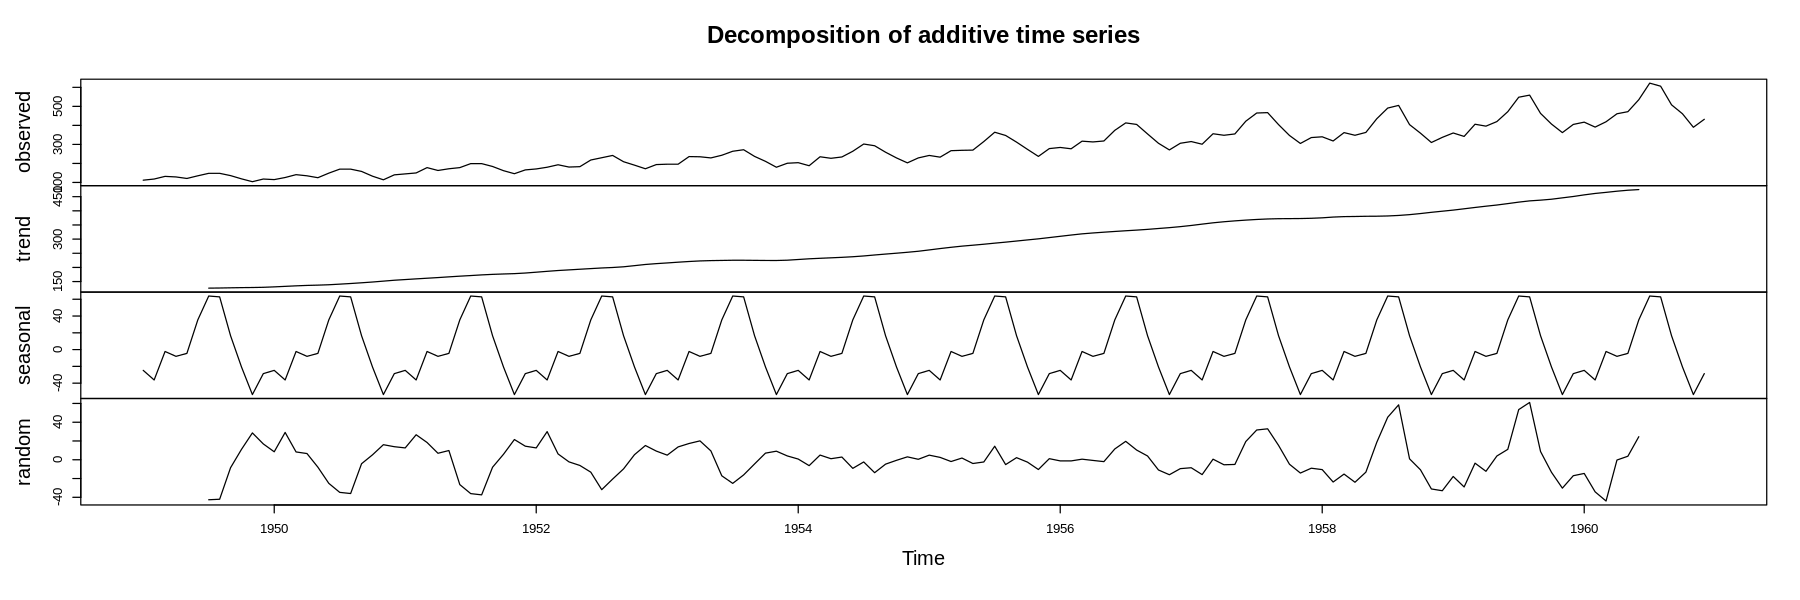

In [13]:
df%>%decompose()%>%plot()

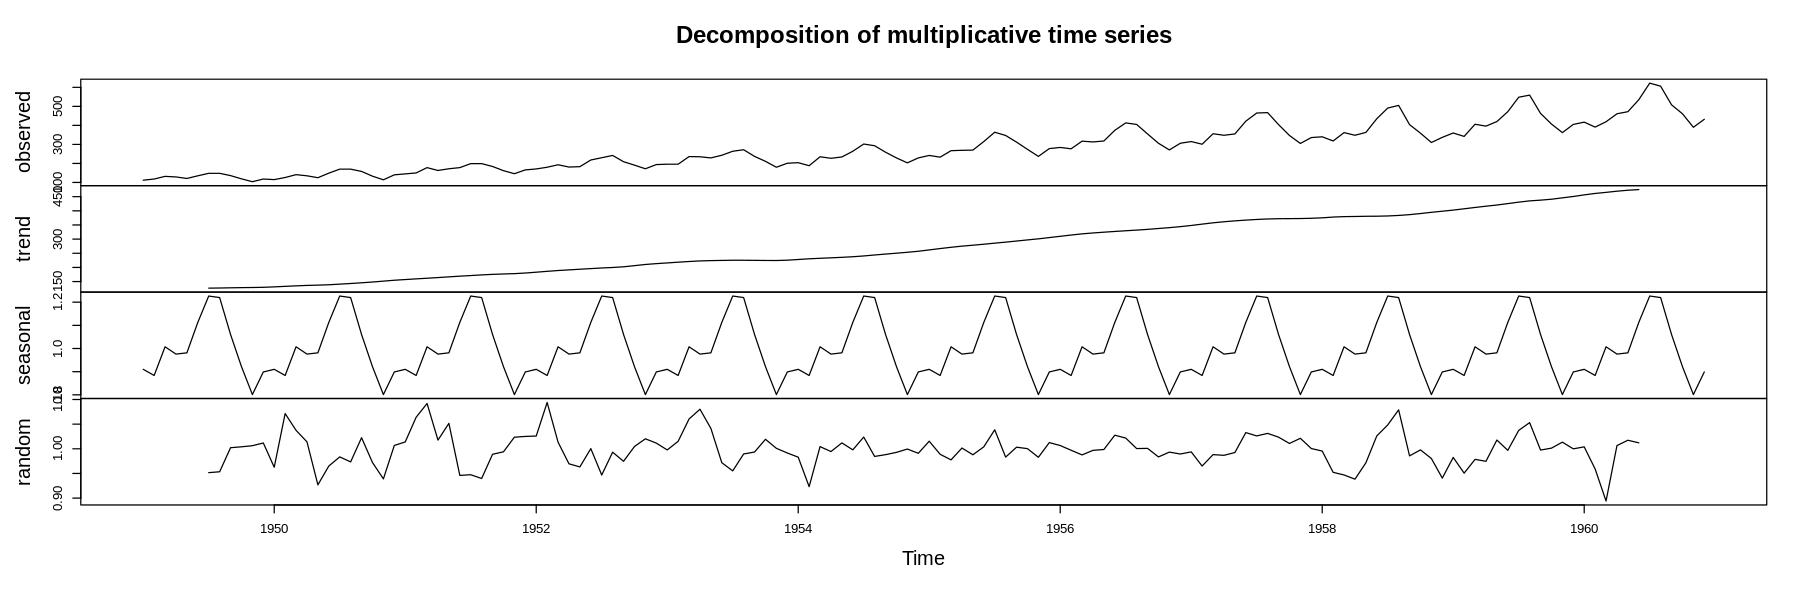

In [14]:
df %>% decompose(type = "multiplicative") %>%plot()

In [16]:
install.packages("changepoint")
library(changepoint)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.3
 See NEWS for details of all changes.



[1] 1949.000 1949.083 1949.250 1949.333 1949.417 1949.583 1949.667 1949.750
  [9] 1949.833 1950.000 1950.083 1950.167 1950.250 1950.333 1950.417 1950.583
 [17] 1950.667 1950.750 1950.833 1950.917 1951.083 1951.167 1951.250 1951.333
 [25] 1951.417 1951.583 1951.667 1951.750 1951.833 1952.000 1952.083 1952.167
 [33] 1952.333 1952.417 1952.500 1952.583 1952.667 1952.750 1952.833 1953.083
 [41] 1953.250 1953.333 1953.417 1953.500 1953.583 1953.667 1953.750 1953.833
 [49] 1954.000 1954.083 1954.167 1954.250 1954.333 1954.417 1954.500 1954.583
 [57] 1954.667 1954.750 1954.833 1954.917 1955.000 1955.083 1955.333 1955.417
 [65] 1955.500 1955.583 1955.667 1955.750 1955.833 1956.083 1956.333 1956.417
 [73] 1956.500 1956.583 1956.667 1956.750 1956.833 1956.917 1957.000 1957.083
 [81] 1957.167 1957.250 1957.333 1957.417 1957.583 1957.667 1957.750 1957.833
 [89] 1958.000 1958.083 1958.167 1958.250 1958.333 1958.417 1958.500 1958.583
 [97] 1958.667 1958.750 1958.833 1958.917 1959.000 1959.083 1959.167 1959.250
[105] 1959.333 1959.417 1959.500 1959.583 1959.667 1959.750 1959.833 1959.917
[113] 1960.000 1960.083 1960.167 1960.250 1960.333 1960.417 1960.500 1960.583
[121] 1960.667 1960.750 1960.833

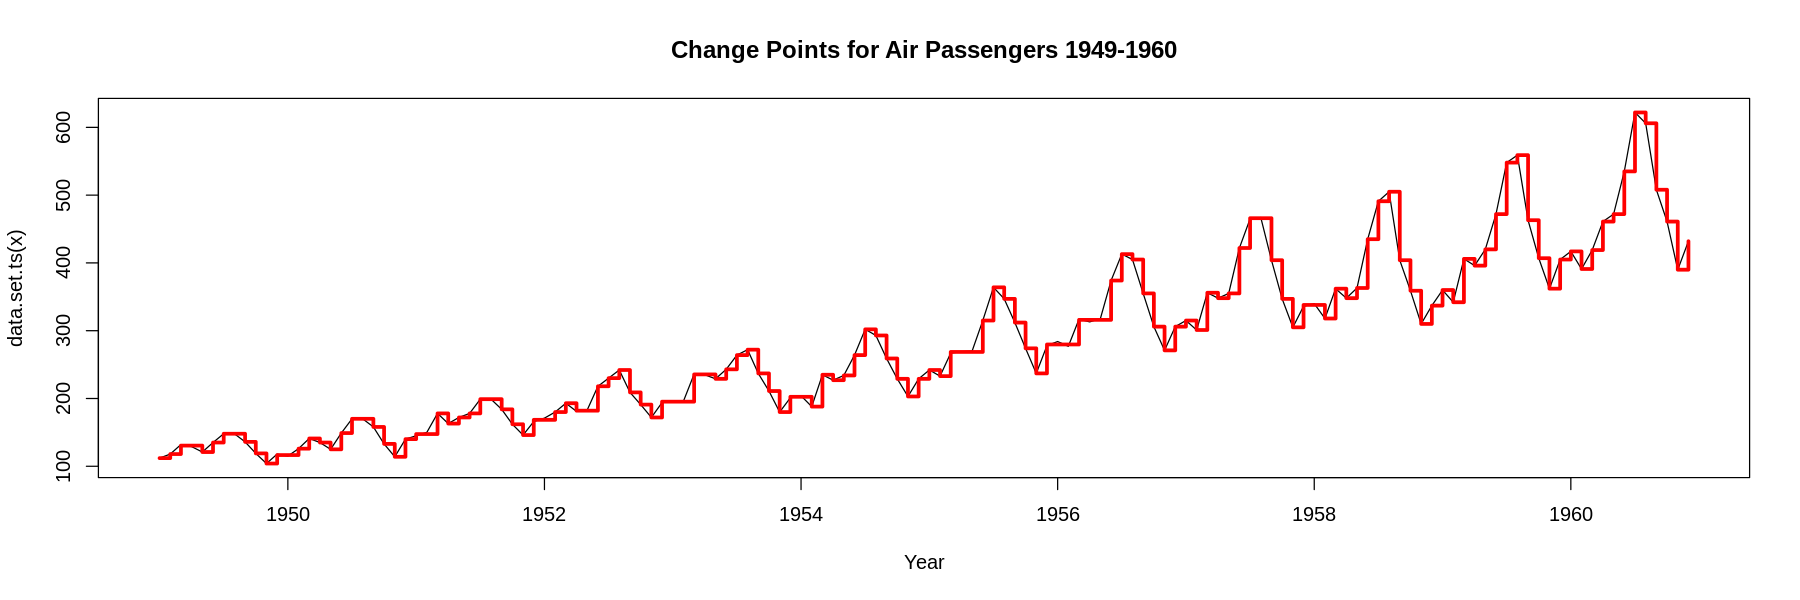

In [17]:
# Compute and plot time series with change points; can look
# for changepoints in mean using `cpt.mean()`, in variance
# with `cpt.var()`, or both with `cpt.meanvar()`.
df %>%
  cpt.mean(
    test.stat = "Normal"
  ) %T>%                  # T-pipe
  plot(                   # Add change point lines to plot
    cpt.width = 3,        # Line width
    main = "Change Points for Air Passengers 1949-1960",
    xlab = "Year"
  ) %>%
  cpts.ts()               # Print change point location(s)
